In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
df['CRIM'].fillna(df['CRIM'].mean(),inplace=True)
df['ZN'].fillna(df['ZN'].mean(),inplace=True)
df['INDUS'].fillna(df['INDUS'].mean(),inplace=True)
df['CHAS'].fillna(df['CHAS'].mean(),inplace=True)
df['AGE'].fillna(df['AGE'].mean(),inplace=True)
df['LSTAT'].fillna(df['LSTAT'].mean(),inplace=True)

In [6]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000,22.0


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980000
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140000
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030000
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940000
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,12.715432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,12.715432
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080000
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640000
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480000


In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.3,random_state = 42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
print(regression.coef_)

[-1.06184703  0.71347682 -0.07272768  0.94344207 -1.62856223  3.17333232
 -0.70109167 -3.04177516  1.69879013 -1.20047368 -1.99733627  1.02127847
 -3.28653232]


In [14]:
print(regression.intercept_)

23.01581920903955


In [15]:
reg_predict = regression.predict(X_test)
reg_predict

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

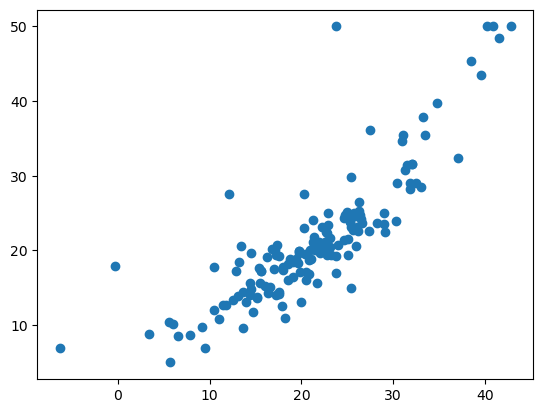

In [16]:
plt.scatter(reg_predict,y_test)

In [18]:
score = r2_score(y_test,reg_predict)
print(score)

0.7071862632031753


In [19]:
import pickle

In [21]:
pickle.dump(regression,open('Regressino.pkl','wb'))